# 1 | Описание датасета

**Ноутбук для первичного анализа данных, определения дальнейших шагов по разработке сервиса для предсказания "измены" партнёра.**

| Название признака | Описание |
|-------------------|----------|
| affairs           | Числовой признак. Была ли измена, 0 - нет, 1 - да. |
| age               | Числовой признак. Закодированный возраст в годах: 17,5 = до 20 лет, 22 = 20-24, 27 = 25-29, 32 = 30-34, 37 = 35-39, 42 = 40-44, 47 = 45-49, 52 = 50-54, 57 = 55 и старше. |
| yrs_married       | Числовой признак. Закодированное количество лет в браке: 0,125 = 3 месяца или меньше, 0,417 = 4-6 месяцев, 0,75 = 6 месяцев-1 год, 1,5 = 1-2 года, 4 = 3-5 лет, 7 = 6-8 лет, 10 = 9-11 лет, 15 = 12 и более лет. |
| children          | Числовой признак. Количество детей в браке. |
| religious         | Числовой признак. Закодированная религиозность: 1 = против, 2 = совсем нет, 3 = немного, 4 = в некоторой степени, 5 = очень. |
| educ              | Числовой признак. Закодированный уровень образования: 9 = начальная школа, 12 = выпускник средней школы, 14 = некоторые колледжи, 16 = выпускник колледжа, 17 = некоторые аспирантуры, 18 = степень магистра, 20 = доктор философии, доктор медицинских наук или другая высшая степень. |
| occupation        | Числовой признак. Закодированные профессии в соответствии с классификацией Холлингсхеда (обратная нумерация). |
| occupation_husb   | Числовой признак. Закодированные профессии супруги в соответствии с классификацией Холлингсхеда (обратная нумерация). |
| rate_marriage     | Числовой признак. Закодированная самооценка брака: 1 = очень несчастлив, 2 = несколько несчастлив, 3 = средний, 4 = счастливее среднего, 5 = очень счастлив. |


# 2 | Импорт библиотек

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from colorama import Fore, Style


sns.set_theme(style='white')

# 3 | Датасет

In [14]:
current_directory = Path.cwd()
RAW_DATA_PATH = current_directory.parent / 'data/raw/affair_data.csv'

In [15]:
raw_data = pd.read_csv(RAW_DATA_PATH)
raw_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


# 4 | Проверка структуры датасета

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


Датасет состоит из 6366 строк и 9 признаков, все признаки имеют числовой тип данных. На первый взгялд пропуски отсутствуют.
Таргетом нашей задачи является признак "affairs", который в дальнейшем мы будем классифицировать.

In [17]:
max_column_length = max(len(column) for column in raw_data.columns)

for column in raw_data.columns:
    unique_values = raw_data[column].unique()
    padding = ' ' * (max_column_length - len(column))
    print(f"{Style.BRIGHT}Уникальные значения для столбца{Style.RESET_ALL} '{Fore.BLUE}{column}{Style.RESET_ALL}':{padding} {', '.join(map(str, unique_values))}")

Уникальные значения для столбца 'rate_marriage':   3.0, 4.0, 5.0, 2.0, 1.0
Уникальные значения для столбца 'age':             32.0, 27.0, 22.0, 37.0, 42.0, 17.5
Уникальные значения для столбца 'yrs_married':     9.0, 13.0, 2.5, 16.5, 23.0, 6.0, 0.5
Уникальные значения для столбца 'children':        3.0, 0.0, 4.0, 1.0, 5.5, 2.0
Уникальные значения для столбца 'religious':       3.0, 1.0, 2.0, 4.0
Уникальные значения для столбца 'educ':            17.0, 14.0, 16.0, 12.0, 20.0, 9.0
Уникальные значения для столбца 'occupation':      2.0, 3.0, 5.0, 4.0, 1.0, 6.0
Уникальные значения для столбца 'occupation_husb': 5.0, 4.0, 3.0, 2.0, 6.0, 1.0
Уникальные значения для столбца 'affairs':         1, 0


Проверили уникальные значений каждого признака, отсутствуют символы, например, "?", "." e.t.c., которыми авторы датасетов обозначают пропущенные значения. Теперь с уверенностью можно сказать, что датасет целый.

In [18]:
raw_data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


# 5 | EDA

### 5.1 | Матрица корреляций

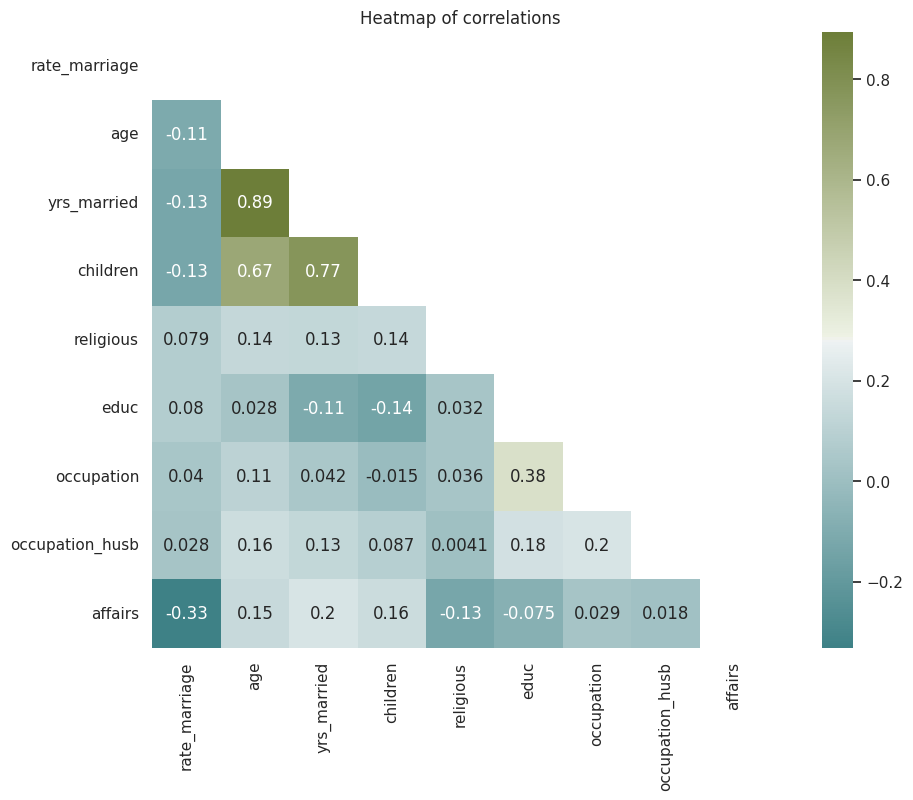

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title('Heatmap of correlations')
mask = np.triu(np.ones_like(raw_data.corr(), dtype=bool))
cmap = sns.diverging_palette(200, 100, as_cmap=True)
sns.heatmap(raw_data.corr(), mask=mask, cmap=cmap, square=True, annot=True, fmt='.2g')
plt.show()

### 5.2 | Boxplot числовых признаков

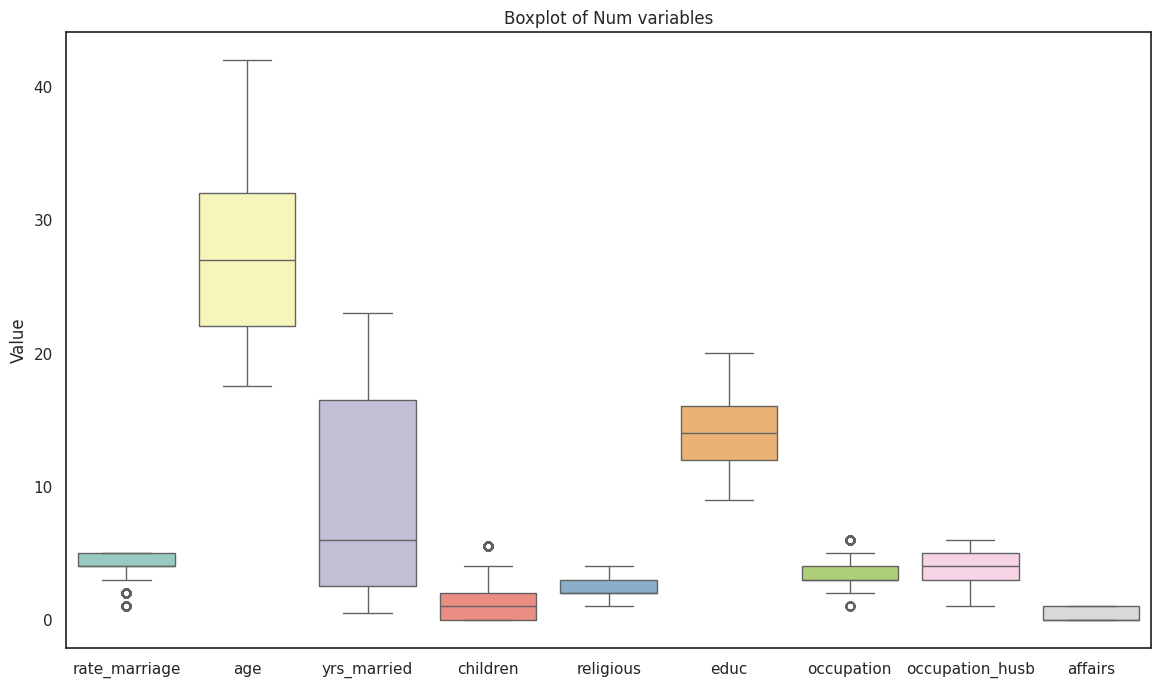

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=raw_data, palette='Set3')
plt.title('Boxplot of Num variables')
plt.ylabel('Value')
plt.show()

### 5.3 | Распределение таргета

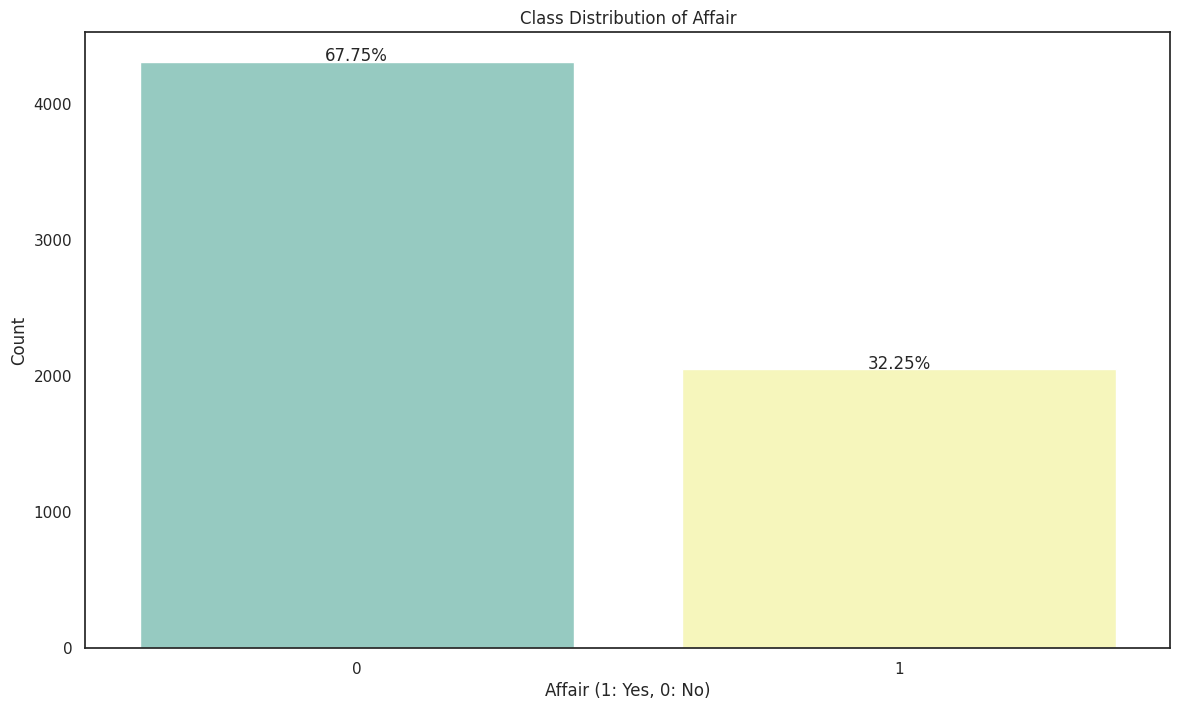

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(data=raw_data, x='affairs', hue='affairs', palette='Set3', legend=False)

plt.title('Class Distribution of Affair')
plt.xlabel('Affair (1: Yes, 0: No)')
plt.ylabel('Count')

total = float(len(raw_data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.show()

Присутствует небольшой дисбаланс классов.

### 5.4 | Affairs X Age

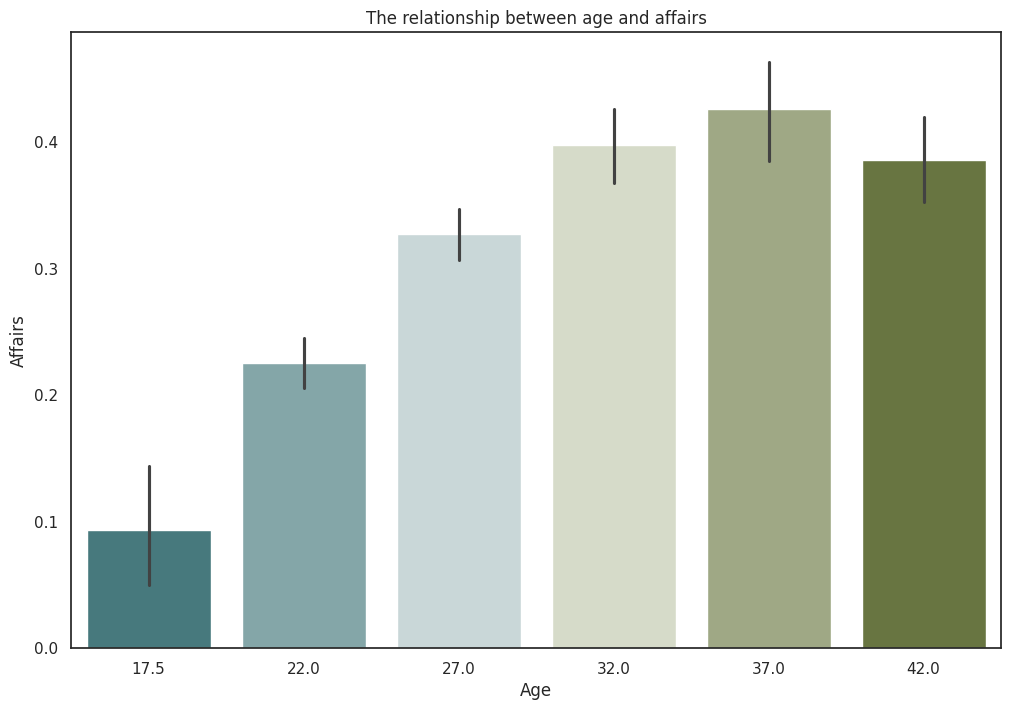

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x='age', y='affairs', hue='age', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between age and affairs')
plt.xlabel('Age')
plt.ylabel('Affairs')
plt.show()

Эта диаграмма свидетельствует нам о том, что чем старше мужчина - тем чаще он вступает во внебрачные отношения.

### 5.5 | Affairs X Yrs_Married

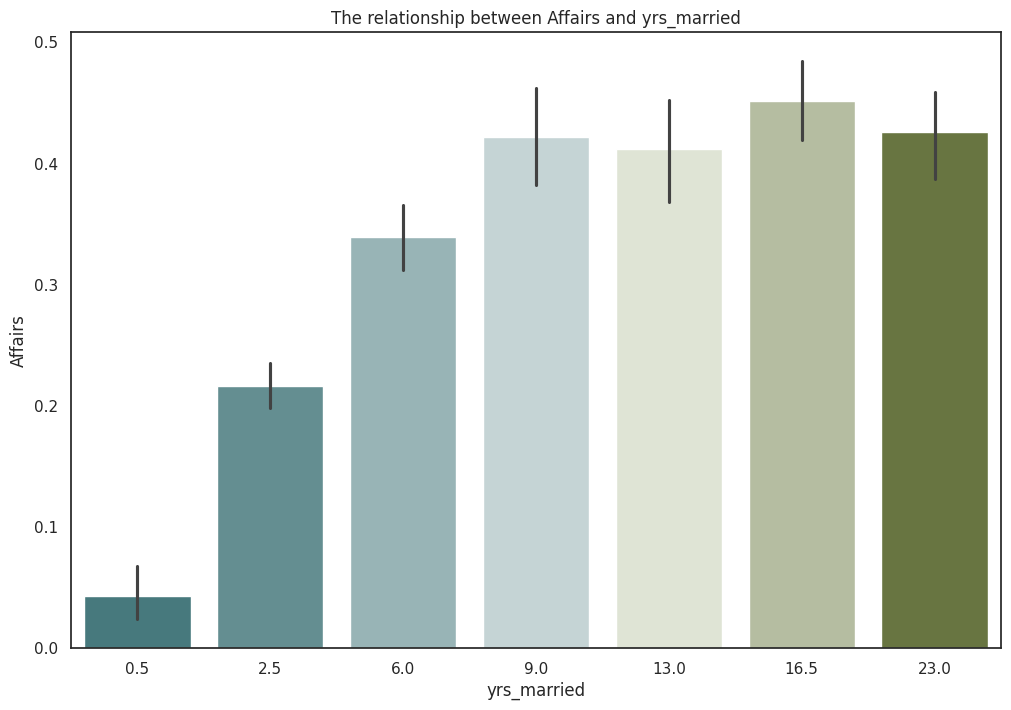

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='yrs_married', y='affairs', hue='yrs_married', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between Affairs and yrs_married')
plt.xlabel('yrs_married')
plt.ylabel('Affairs')
plt.show()

Здесь мы видим, что с увеличением количества лет брака - шанс измены возрастает.

### 5.6 | Affairs X Religious

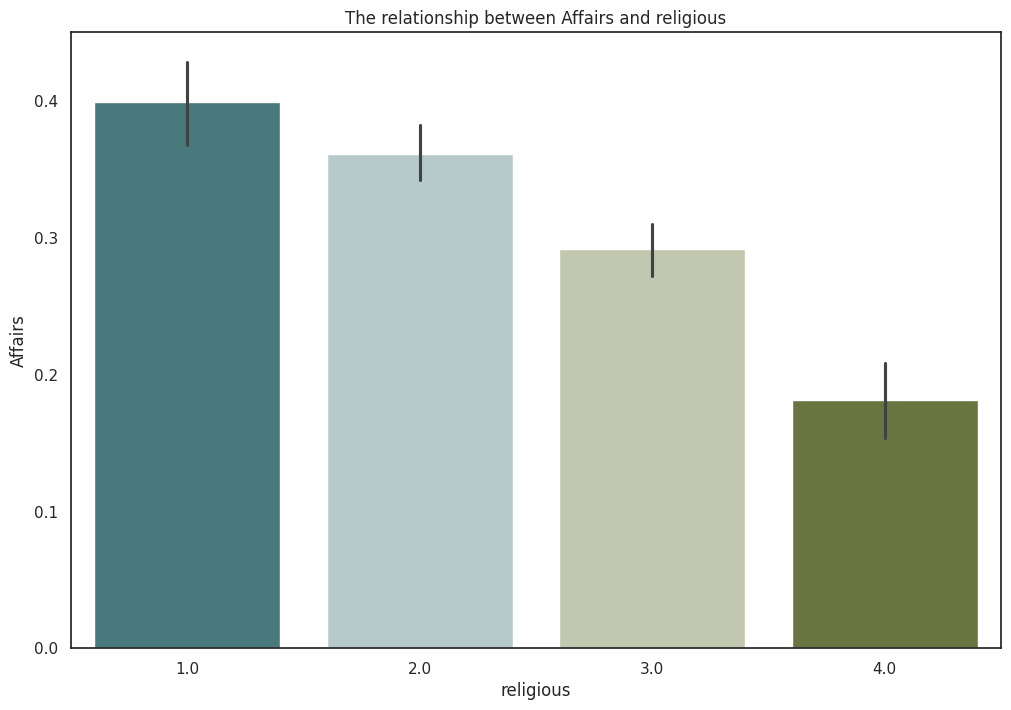

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='religious', y='affairs', hue='religious', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between Affairs and religious')
plt.xlabel('religious')
plt.ylabel('Affairs')
plt.show()

Признак веры играет сильную обратную связь на шанс измены. Чемы выше уровень религиозности - тем меньше шанс завести роман.

### 5.7 | Affairs X Occupation

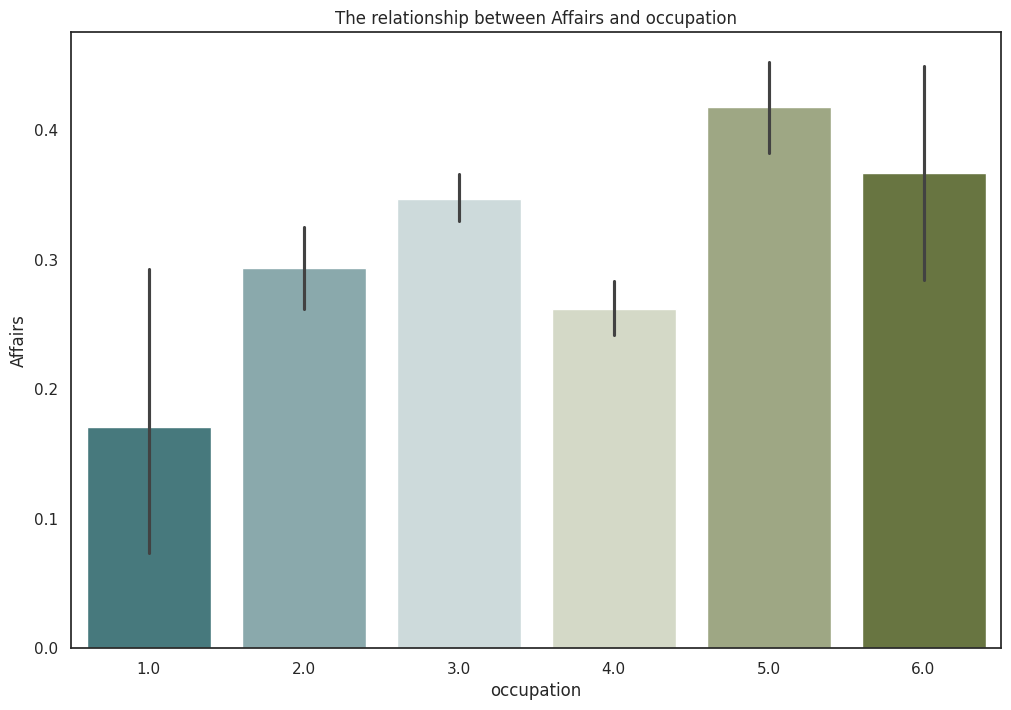

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x='occupation', y='affairs', hue='occupation', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between Affairs and occupation')
plt.xlabel('occupation')
plt.ylabel('Affairs')
plt.show()

Чёткой взаимосвязи между проффесией и изменами не наблюдается, однако, мужчины, принадлежащие первой группы менее склонны к интригам.

### 5.8 | Affairs X Rate_Marriage

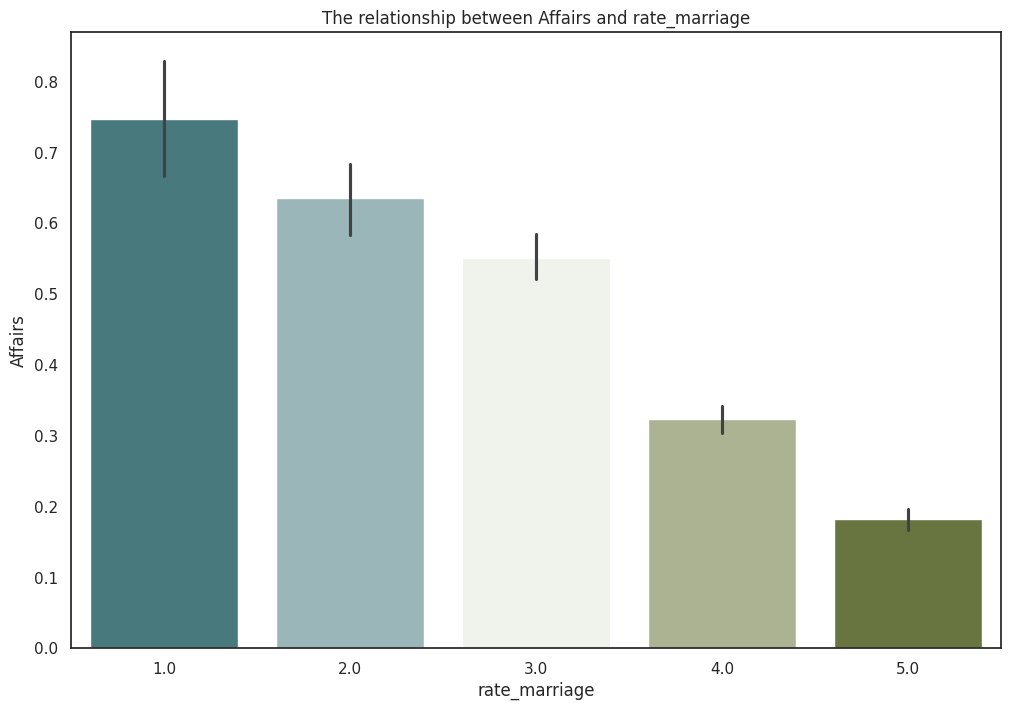

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rate_marriage', y='affairs', hue='rate_marriage', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between Affairs and rate_marriage')
plt.xlabel('rate_marriage')
plt.ylabel('Affairs')
plt.show()

Исходя из этой диаграммы мы можем сделать вывод, что группы (1, 2 и 3), которые менее счастливы в браке - имеют больший шанс к измене.

### 5.9 | Affairs X Education

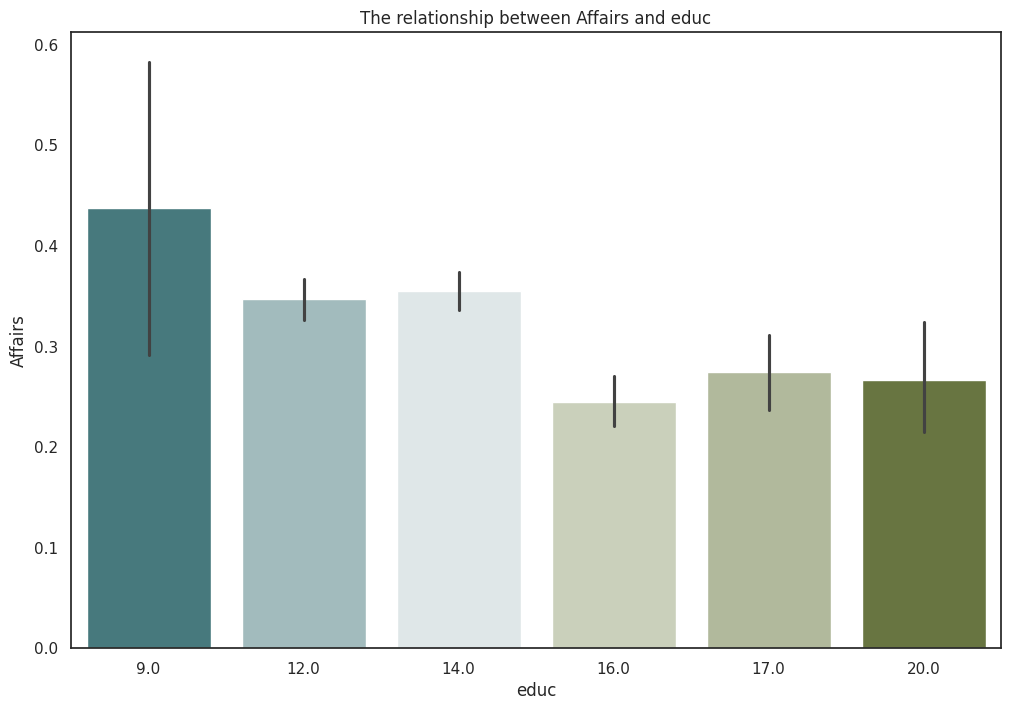

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x='educ', y='affairs', hue='educ', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between Affairs and educ')
plt.xlabel('educ')
plt.ylabel('Affairs')
plt.show()

Явной взаимосвязи между уровнем образования и романами - нет.

### 5.10 | Children X Rate_Marriage

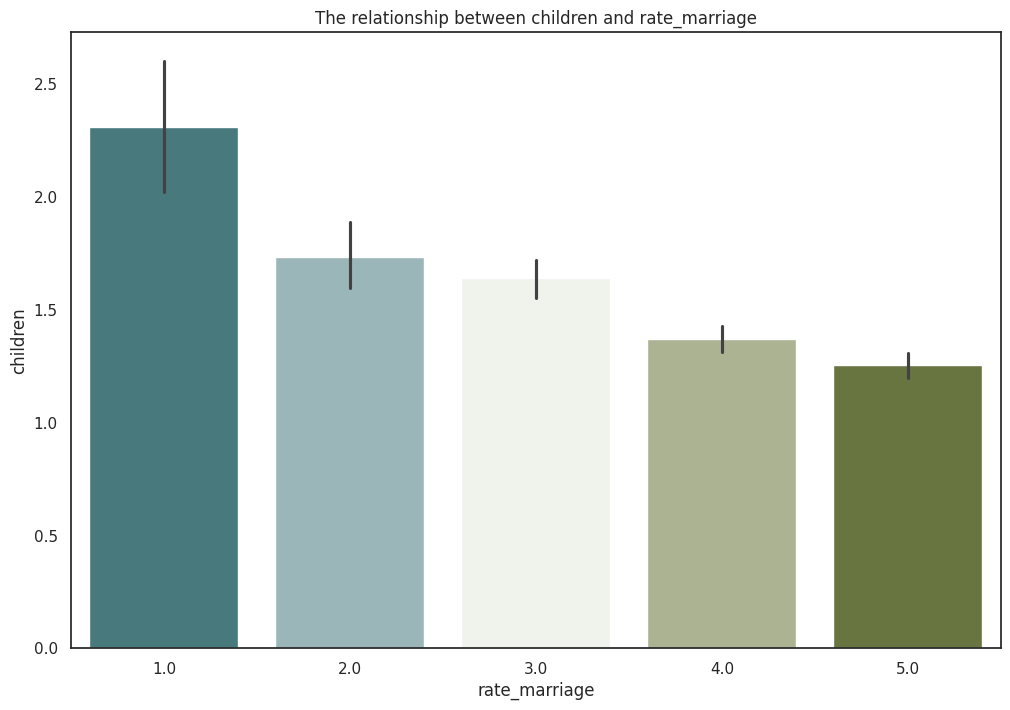

In [56]:
plt.figure(figsize=(12, 8))
sns.barplot(x='rate_marriage', y='children', hue='rate_marriage', legend=False, data=raw_data, palette=cmap)
plt.title('The relationship between children and rate_marriage')
plt.xlabel('rate_marriage')
plt.ylabel('children')
plt.show()

Чем больше детей - тем меньше мужчины в данной выборке довольны браком.